In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
sale_pred=pd.read_csv(r'advertising.csv')

In [3]:
sale_pred.head(5)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [4]:
sale_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
sale_pred.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


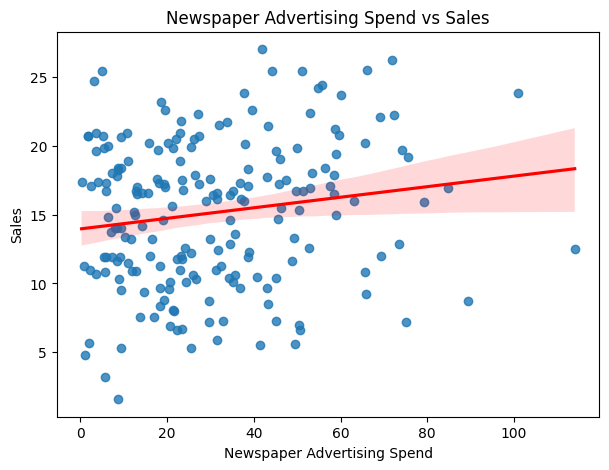

In [6]:
plt.figure(figsize=(7, 5))
sns.regplot(x='Newspaper', y='Sales', data=sale_pred, line_kws={'color': 'red'})
plt.title('Newspaper Advertising Spend vs Sales')
plt.ylabel('Sales')
plt.xlabel('Newspaper Advertising Spend')
plt.show()

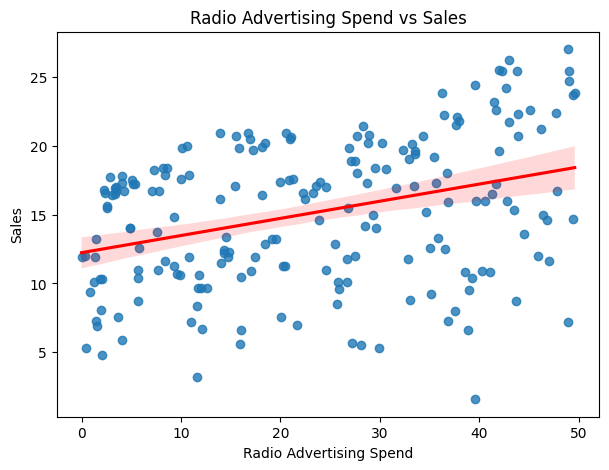

In [7]:
plt.figure(figsize=(7, 5))
sns.regplot(x='Radio', y='Sales', data=sale_pred, line_kws={'color': 'red'})
plt.title('Radio Advertising Spend vs Sales')
plt.ylabel('Sales')
plt.xlabel('Radio Advertising Spend')
plt.show()

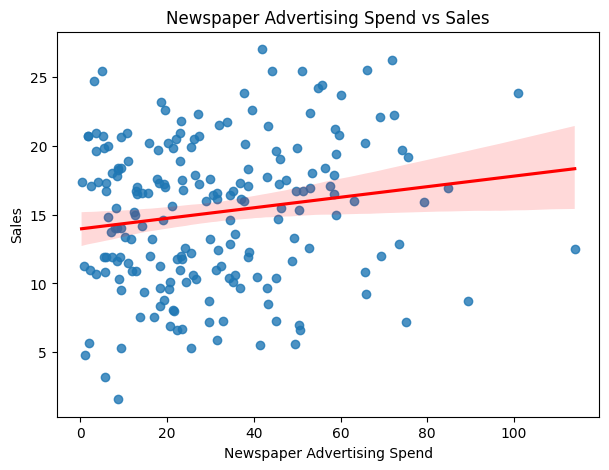

In [8]:
plt.figure(figsize=(7, 5))
sns.regplot(x='Newspaper', y='Sales', data=sale_pred, line_kws={'color': 'red'})
plt.title('Newspaper Advertising Spend vs Sales')
plt.ylabel('Sales')
plt.xlabel('Newspaper Advertising Spend')
plt.show()

In [9]:
# Define features and target variable
X = sale_pred.drop(columns=['Sales'])  # Assuming 'sales' is the target variable
y = sale_pred['Sales']

In [10]:
X.head()

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [11]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# Convert data to DMatrix format for XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

In [13]:
# Parameters for XGBoost
params = {
    'max_depth': 3,
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse'
}

In [14]:
# Train the XGBoost model
num_rounds = 100
xgb_model = xgb.train(params, dtrain, num_rounds)

In [15]:
# Make predictions on the test set
y_pred = xgb_model.predict(dtest)

In [16]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 1.6649970717962788
R^2 Score: 0.9461185177292627


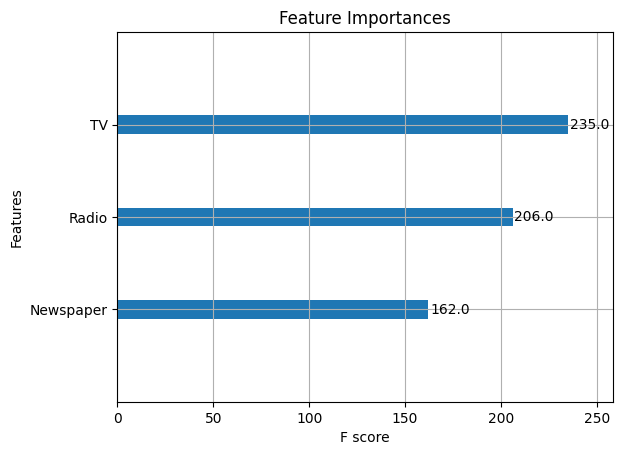

In [17]:
# Feature importance
xgb.plot_importance(xgb_model)
plt.title('Feature Importances')
plt.show()